# 1	NetworkX – Python библиотека за графови 

Граф во математиката и компјутерските науки претставува колекција од јазли кои можат да бидат поврзани помеѓу себе со врски (рабови). NetworkX претставува библиотека за програмскиот јазик Python за создавање, манипулација, и проучување на структурата, динамиката и функциите на сложените мрежи. Инсталацијата на NetworkX е преку следата команда:

` pip install networkx `

Главната структура е `Graph`. Еден граф може да биде насочен и ненасочен, и може да вклучува паралелни врски помеѓу два јазли, па соодветно во NetworkX се дефинирани:

- `Graph` – ненасочен едноставен граф (дозволува јамки (self-loops))
- `DiGraph` – насочен едноставен граф (дозволува јамки (self-loops))
- `MultiGraph` – ненасочен граф со повеќе врски помеѓу пар на јазли 
- `MultiDiGraph` – насочен граф со повеќе врски помеѓу пар на јазли



За да се креира едноставен празен граф се користи податочната структура која што ни е потребна:

In [1]:
import networkx as nx

g = nx.Graph()
d = nx.DiGraph()
m = nx.MultiGraph()
h = nx.MultiDiGraph()

Вака креираните графови немаат дефинирани јазли и врски, па за да се креираат овие две компоненти се користат функциите `nx.add_node(name, args*)` и `nx.add_edge(source, target, args*)`. Врските во графот можат да бидат и тежински, па соодветно NetworkX поддржува поставување на тежини на врските:

In [2]:
g.add_edge(35, 2, weight=5)

### Вчитување на податоци

Библиотеката вклучува поддршка за читање/запишување на графови во различен формат на датотеки. Пример, за читање на листа од врски може да користиме датотека во која секој ред е една врска опишана со идентификатор на стартниот јазел и дестинацискиот јазел, одделени со празно место:

In [4]:
g = nx.read_edgelist("test.edges")

Друг пример е доколку читаме листа на соседство, односно датотека во која секој ред е даден јазел, по кој следуваат неговите соседи: 

In [6]:
g = nx.read_adjlist("test_adj.txt")

Дополнително, доколку имаме различен начин на претставување на графот кој се чита од дадена датотека, можеме датотеката да ја вчитаме во pandas Dataframe структура, од која потоа може да го креираме графот преку следната функција: 

`nx.from_pandas_edgelist(edgelist, edge_attr="label")`


### Пристапување на врски и јазли

Покрај прегледите `Graph.edges()` и `Graph.adj()`, можен е пристап до врските и соседите со употреба на стандардна Python нотација: 

In [8]:
g['a']

AtlasView({'b': {}, 'f': {}})

In [9]:
g['a']['b']

{}

In [10]:
g.edges['a', 'b']

{}

Може да се добијат/постават атрибути на врските со користење на следната нотација: 

In [15]:
g.add_edge('a', 'g')
g['a']['g']['color'] = "blue"
g.edges['a', 'b']['color'] = "red"
g.edges['a', 'b']

{'color': 'red'}

Брзо испитување на сите (јазeл, соседство) парови се постигнува со употреба на `Graph.adjacency()` или `Graph.adj.items()`. Забележете дека за ненасочените графови, итерацијата на сеседство ја гледа секоја врска двапати.

In [16]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Погодниот пристап до сите рабови се постигнува со атрибутот `edges`:

In [17]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


## Граф генератори и оператори

Графовите може да се конструираат преку node-by-node или edge-by-edge пристапи прикажани до сега, но дполнително може да се креираат и со: 

#### 1. Примена на класични граф операции како што се: 

- `subgraph(G, nbunch)`      - индуциран подфраг на `G` од јазлите кои се специфицирани со `nbunch`
- `union(G1,G2)`             - граф унија
- `disjoint_union(G1,G2)`    - граф унија со претпоставка дека сите јасли се различни
- `cartesian_product(G1,G2)` - враќа граф од Декартов производ
- `compose(G1,G2)`           - комбинира графови идентификувајќи ги јазлите кои се заеднички за двата графови
- `complement(G)`            - граф комплемент
- `create_empty_copy(G)`     - враќа празна копија на истата граф класа
- `to_undirected(G)` - враќа ненансочена решрезентација на `G`
- `to_directed(G)`   - враќа нансочена решрезентација на `G`

#### 2. Користење повик до еден од класичните мали графови:

In [18]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

#### 3. Користење на (конструктивен) генератор за класичен граф:

In [19]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

#### 4. Користење на веројатносен генератор на граф:

In [20]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

#### 5. Читање на граф зачуван во датотека користејќи вообичаени формати на графови, како што се листа на врски, листа на соседство, GML, GraphML, LEDA и др.:

In [21]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

## Анализа на графови 

Структурата на графот `G` може да се анализира со различни граф-теоретски функции, како што се: 

In [22]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
print(list(nx.connected_components(G)))
print(sorted(d for n, d in G.degree()))
print(nx.clustering(G))

[{1, 2, 3}, {'spam'}]
[0, 1, 1, 2]
{1: 0, 2: 0, 3: 0, 'spam': 0}


Некои функции со голем излез ги повторуваат паровите (јазел, вредност) како торки од 2 елементи. Ако сакате, тие лесно се чуваат во структура на речник:

In [24]:
list(nx.all_pairs_shortest_path(G))

[(1, {1: [1], 2: [1, 2], 3: [1, 3]}),
 (2, {2: [2], 1: [2, 1], 3: [2, 1, 3]}),
 (3, {3: [3], 1: [3, 1], 2: [3, 1, 2]}),
 ('spam', {'spam': ['spam']})]

In [25]:
dict(nx.all_pairs_shortest_path(G))

{1: {1: [1], 2: [1, 2], 3: [1, 3]},
 2: {2: [2], 1: [2, 1], 3: [2, 1, 3]},
 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]},
 'spam': {'spam': ['spam']}}

In [26]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

Погледнете ги [Алгоритмите](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) за детали за граф алгоритмите кои се поддржани и имплементирани во библиотеката.

## Цртање на графови 


NetworkX не е првенствено пакет за цртање графови, но вклучена е основна визуелизација со Matplotlib, како и интерфејс за користење на софтверскиот пакет **Graphviz**. Функционалностите се дел од модулот `networkx.drawing` и се вклучуваат ако успешно се импортирани. За да се тестира успешниот импорт на `networkx.drawing` може да се исцрта `G` со следните:

In [32]:
import matplotlib.pyplot as plt

In [33]:
# ipython -pylab

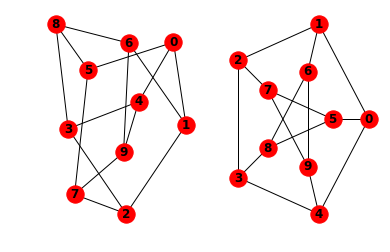

In [34]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

Ako Graphviz и PyGraphviz или pydot, се достапни, исто така може да се користи `nx_agraph.graphviz_layout(G)` или `nx_pydot.graphviz_layout(G)` за да се земат позициите на јазлите, или за да се запише графот во dot формат за понатамошно процесирање. 

In [ ]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

## Дополнителни функционалности: 

За подетални информации за работа со оваа библиотека погледнете ја [документацијата](https://networkx.github.io/documentation/latest/_downloads/networkx_reference.pdf). 